In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
yolo=cv2.dnn.readNet('yolov3-tiny.weights','yolov3-tiny.cfg')

In [3]:
classes=[]
with open('coco.names','r') as f:
    classes=f.read().splitlines()

In [4]:
# classes

In [5]:
len(classes)

80

In [6]:
image=cv2.imread('samsung.jpeg')

In [7]:
blob=cv2.dnn.blobFromImage(image,1/255,(320,320),(0,0,0),swapRB=True,crop=False)

In [8]:
blob.shape

(1, 3, 320, 320)

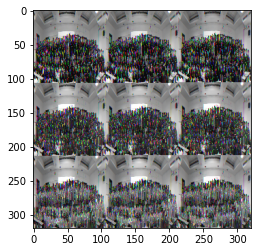

In [9]:
i=blob[0].reshape(320,320,3)
plt.imshow(i)

In [10]:
yolo.setInput(blob)

In [11]:
output_layes_names=yolo.getUnconnectedOutLayersNames()
layeroutput=yolo.forward(output_layes_names)

In [12]:
boxes=[]
confidences=[]
class_ids=[]
for output in layeroutput:
    for detection in output:
        score=detection[5:]
        class_id=np.argmax(score)
        confidence=score[class_id]
        if confidence>0.7:
            center_x=int(detection[0]*width)
            center_x=int(detection[0]*height)
            w=int(detection[0]*width)
            h=int(detection[0]*height)
            x=int(center_x-w/2)
            y=int(center_y-h/2)
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_ids)

In [13]:
len(boxes)

0

In [14]:
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)

In [15]:
font=cv2.FONT_HERSHEY_PLAIN
colors=np.random.uniform(0,255,size=(len(boxes),3))

In [16]:
if len(indexes) > 0:
    for i in indexes.flatten():
        x,y,w,h=boxes[i]
        label=str(classes[class_ids[i]])
        confi=str(round(confidences[i],2))
        color=colors[i]
        cv2.rectangle(ing,(x,y),(x+w,y+h),color,1)
        cv2.putText(img,label+" "+confi,(x,y+20),font,2,(255,255,255),1)

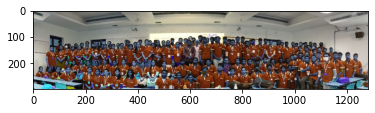

In [17]:
plt.imshow(image)

In [18]:
cv2.imwrite('img.png',image)

True